# 模型彙總與結構圖

## 模型

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# 建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 模型訓練
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2)

# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4627 - accuracy: 0.8644 - val_loss: 0.1320 - val_accuracy: 0.9620
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1320 - accuracy: 0.9605 - val_loss: 0.0989 - val_accuracy: 0.9711
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0900 - accuracy: 0.9731 - val_loss: 0.1064 - val_accuracy: 0.9671
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0657 - accuracy: 0.9803 - val_loss: 0.0846 - val_accuracy: 0.9758
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0572 - accuracy: 0.9814 - val_loss: 0.0763 - val_accuracy: 0.9781
loss: 0.0712
accuracy: 0.9779


## 模型彙總

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## 取得神經層資訊

In [4]:
# 以 index 取得神經層資訊
model.get_layer(index=0)

In [6]:
# 以名稱取得神經層資訊
model.get_layer(name='dense_1')

In [10]:
# 取得神經層權重
model.get_layer(name='dense').weights

[<tf.Variable 'dense/kernel:0' shape=(784, 256) dtype=float32, numpy=
 array([[ 0.06128432,  0.02074531, -0.0011949 , ..., -0.00228462,
          0.01631692,  0.01296875],
        [-0.0357642 , -0.02373528, -0.07056347, ...,  0.00011266,
          0.06693211, -0.04019936],
        [-0.01962281,  0.04759216,  0.01057784, ...,  0.02271749,
          0.03115657,  0.04775947],
        ...,
        [ 0.05621411, -0.00679603, -0.00557023, ..., -0.06807736,
          0.03413046, -0.05778757],
        [-0.01650747,  0.03708945, -0.04394133, ...,  0.03744926,
         -0.06648092, -0.04398315],
        [ 0.05465373,  0.02071387, -0.00489767, ...,  0.01178399,
          0.07303886,  0.068471  ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(256,) dtype=float32, numpy=
 array([ 1.51272789e-01, -7.48251081e-02, -6.53015599e-02,  6.27731904e-03,
        -4.49369662e-02, -3.44650447e-02, -6.84645101e-02,  3.07077123e-03,
         3.10799330e-02, -1.10865995e-01, -3.59710753e-02, -5.76641485e

## 繪製結構圖

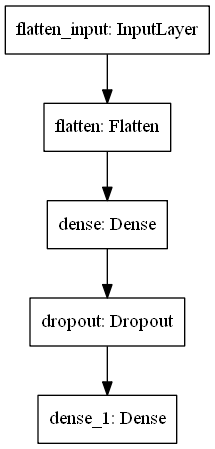

In [12]:
# 繪製結構圖
tf.keras.utils.plot_model(model)

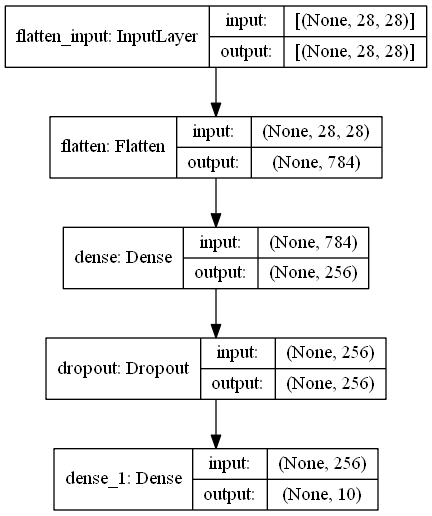

In [13]:
# 繪製結構圖，show_shapes=True
tf.keras.utils.plot_model(model, show_shapes=True)

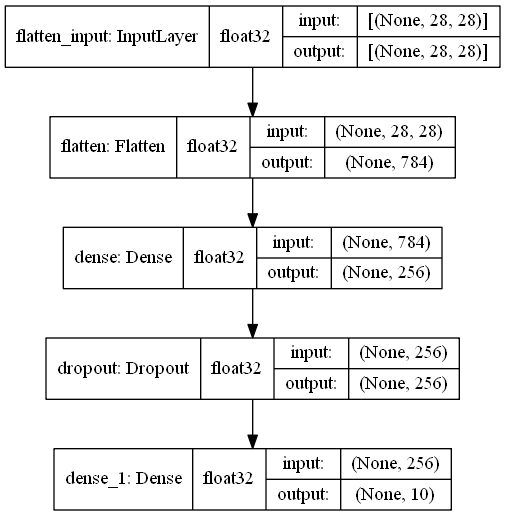

In [18]:
# 繪製結構圖
# show_shapes=True：可顯示輸入/輸出的神經元個數
# show_dtype=True：可顯示輸入/輸出的資料型態
# to_file：可同時存檔
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, 
                          to_file="model.png")

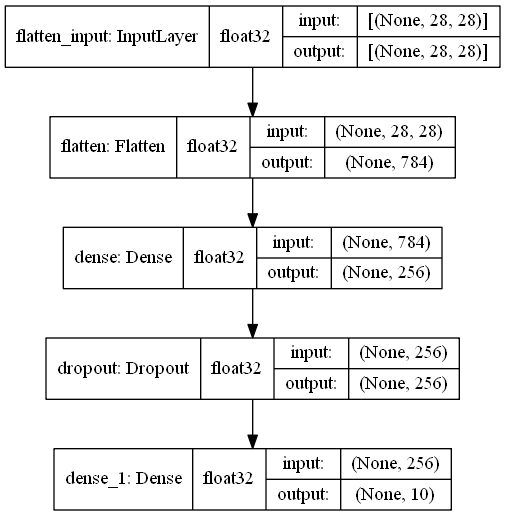

In [25]:
# 產生 dot 格式及 png 檔
import pydotplus as pdp
from IPython.display import display, Image

# 產生 dot 格式
dot1 = tf.keras.utils.model_to_dot(model, show_shapes=True, show_dtype=True)
# 產生 png 檔
display(Image(dot1.create_png()))

## 取得模型結構

In [26]:
# 取得模型結構
config = model.get_config()

# 載入模型結構
# Sequential model
new_model = tf.keras.Sequential.from_config(config)

# function API
# new_model = tf.keras.Model.from_config(config)

## json 格式

In [25]:
# 取得模型結構
json_config = model.to_json()

# 載入模型結構
new_model = tf.keras.models.model_from_json(json_config)

## 取得模型權重

In [18]:
# 取得模型權重
weights = model.get_weights()
weights

[array([[-0.06930512,  0.03726761,  0.00380068, ..., -0.02738923,
         -0.00203806, -0.04691459],
        [ 0.05356444, -0.0537567 ,  0.04397911, ..., -0.02141805,
         -0.00083026,  0.01300515],
        [-0.06667425, -0.06157089,  0.06820697, ..., -0.01314478,
         -0.04206073,  0.03246664],
        ...,
        [ 0.07228206, -0.02019608, -0.07507817, ...,  0.04228979,
          0.03308845, -0.05279912],
        [-0.03155371,  0.01028636,  0.04392704, ...,  0.02967557,
          0.06520335,  0.05697775],
        [-0.05505346,  0.07043868, -0.03045924, ...,  0.060651  ,
          0.06249435, -0.01677797]], dtype=float32),
 array([ 0.0015214 , -0.09300721,  0.04807182, -0.01205327, -0.03367217,
         0.04654895,  0.14866018,  0.07152626,  0.08310274, -0.01258205,
         0.07109213, -0.03280707, -0.03937925,  0.05533374, -0.05376243,
         0.07347038,  0.0903581 , -0.00123163, -0.02873479, -0.03199118,
         0.09177977,  0.07444997, -0.01354779,  0.0175752 , -0.005

In [23]:
# Set weights
new_model.set_weights(weights)

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
new_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# predict
score=new_model.evaluate(x_test_norm, y_test, verbose=0)
score

[0.08337192982435226, 0.9750000238418579]

## 取得模型結構時，Custom Layer 需註冊

In [30]:
class CustomLayer(tf.keras.layers.Layer):
    def __init__(self, units=32, **kwargs):
        super(CustomLayer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

    def get_config(self):
        config = super(CustomLayer, self).get_config()
        config.update({"units": self.units})
        return config


def custom_activation(x):
    return tf.nn.tanh(x) ** 2


# Make a model with the CustomLayer and custom_activation
inputs = tf.keras.Input((32,))
x = CustomLayer(32)(inputs)
outputs = tf.keras.layers.Activation(custom_activation)(x)
model = tf.keras.Model(inputs, outputs)

# Retrieve the config
config = model.get_config()

# Custom Layer 需註冊
custom_objects = {"CustomLayer": CustomLayer, "custom_activation": custom_activation}
with tf.keras.utils.custom_object_scope(custom_objects):
    new_model = tf.keras.Model.from_config(config)